In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import gaussian_kde

In [2]:
def load_data( path ):

    files = os.listdir(path)
    files = [f for f in files if 'MP.csv' in f]

    df = pd.DataFrame()
    for f in files:
        df = pd.concat((df, pd.read_csv(os.path.join(path, f), sep=',')))
    
    df = df[df['Status'].isin(['Active'])]
    df.sort_values(by='gameID', inplace=True)
    df["date"] = pd.to_datetime(df["date"])
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'FT': 'FTM'}, inplace=True)
    
    return df

In [3]:
df = load_data("../data/raw/game_logs")

In [4]:
df_scores = df.groupby(['gameID']).first(['AwayScore', 'HomeScore'])

In [5]:
df_scores

salary  PG  SG  SF  PF  C  GS  SecondsPlayed  Two_PM  Two_PA  ...  \
gameID                                                                ...   
10271     3000   0   0   0   1  0   0              0       0       0  ...   
10272     4800   0   1   0   0  0   0           1661       4       7  ...   
10273     3000   0   0   1   0  0   0              0       0       0  ...   
10274     7100   0   1   0   0  0   1           2395       3      10  ...   
10275     3000   0   0   0   1  0   0            917       0       0  ...   
...        ...  ..  ..  ..  .. ..  ..            ...     ...     ...  ...   
23528     3500   0   0   0   1  1   0           1522       6       7  ...   
23529     4500   0   0   1   1  0   0            990       1       2  ...   
23530     3300   0   1   0   0  0   0            438       1       2  ...   
23531     3000   0   0   0   0  1   0            924       1       3  ...   
23532     3600   1   1   0   0  0   0            995       1       2  ...   

          PPM  Home   TipTime  teamid  OpponentID     Spread  ProjectedTotal  \
gameID                                                                         
10271   0.625     0  0.830000      22          19 -16.016254      195.174313   
10272   1.250     1  0.830000      27           7  11.636669      195.087621   
10273   1.460     1  0.940000      14          11  16.476360      202.327675   
10274   0.856     1  0.790000       4          17  -1.555129      204.270242   
10275   1.117     0  0.830000       5          20  24.820737      204.702011   
...       ...   ...       ...     ...         ...        ...             ...   
23528   1.430     1  0.937500      10          13  12.500000      223.500000   
23529   0.338     1  0.791667      23           9 -12.000000      209.500000   
23530   0.750     1  0.812500      16           4 -11.000000      206.500000   
23531   0.400     1  0.812500       1          20  -5.000000      232.000000   
23532   0.515     1  0.833333       7           8   2.500000      220.500000   

        AwayScore  HomeScore  season  
gameID                                
10271          84        101  201415  
10272         100        101  201415  
10273         108         90  201415  
10274         106        108  201415  
10275         104         80  201415  
...           ...        ...     ...  
23528         131        107  201920  
23529         106        124  201920  
23530         109         98  201920  
23531         136        131  201920  
23532          97        113  201920  

[7099 rows x 32 columns]

In [6]:
max_ = 150
min_ = 60
interval = 3

bins = np.linspace(min_, max_, int((max_-min_)/interval) + 1)

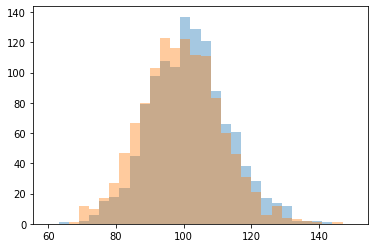

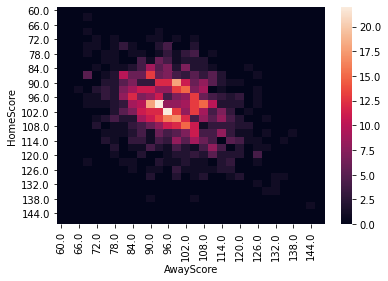

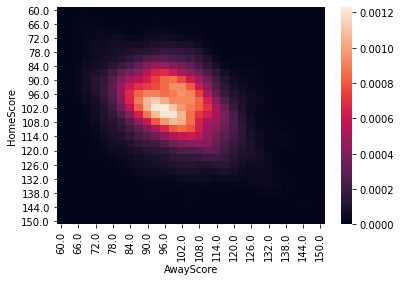

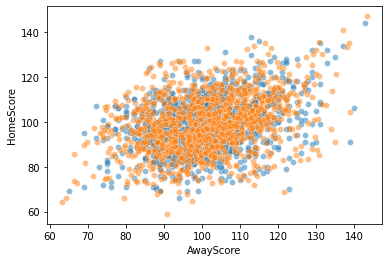

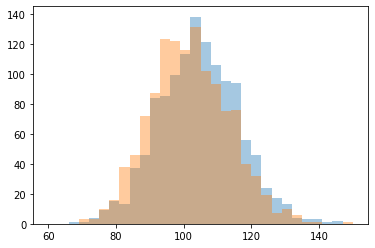

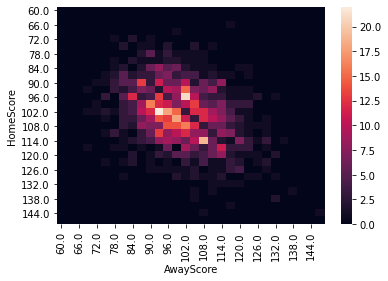

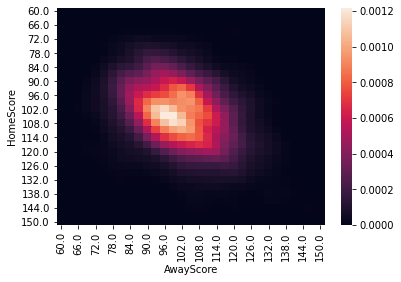

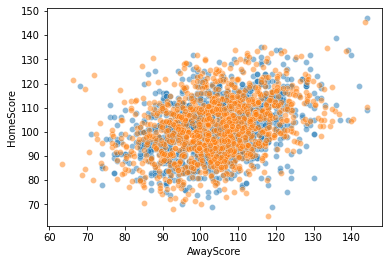

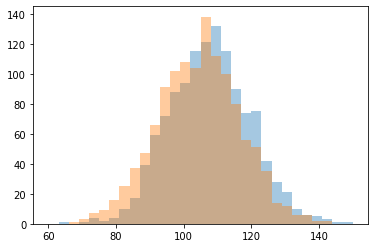

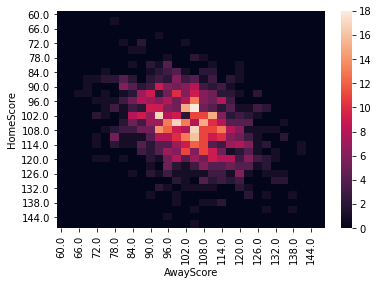

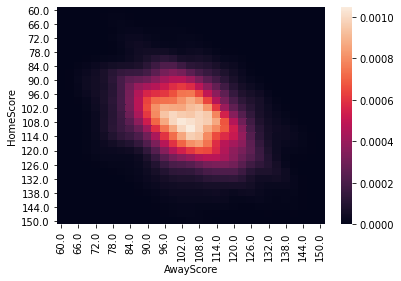

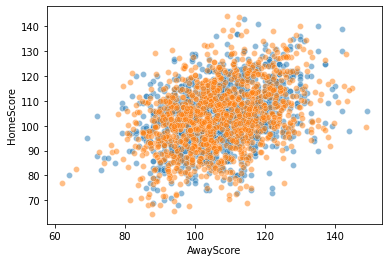

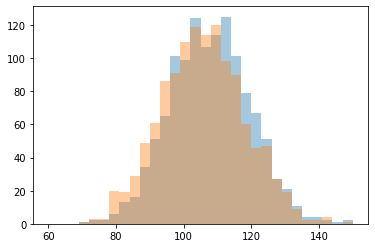

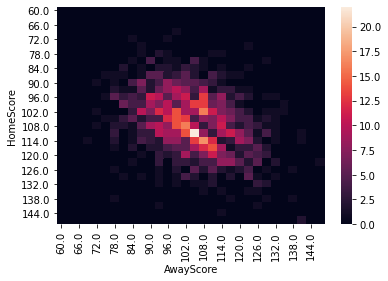

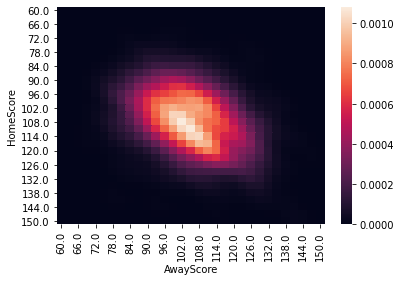

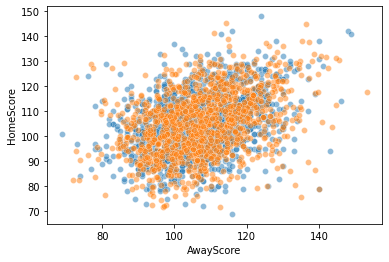

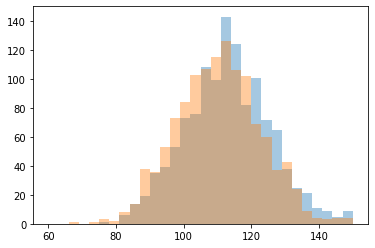

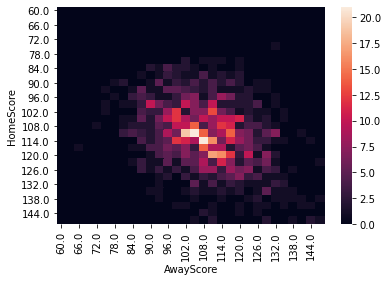

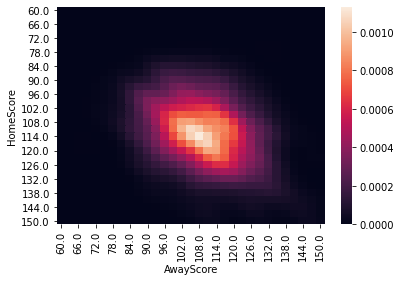

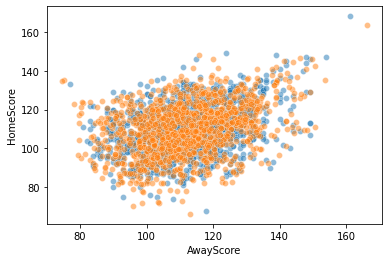

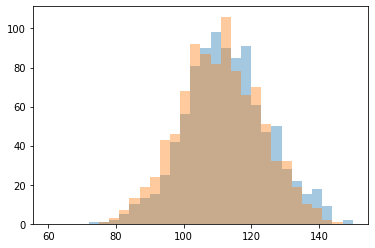

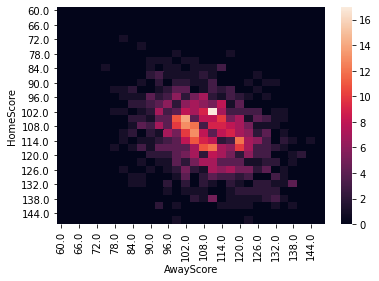

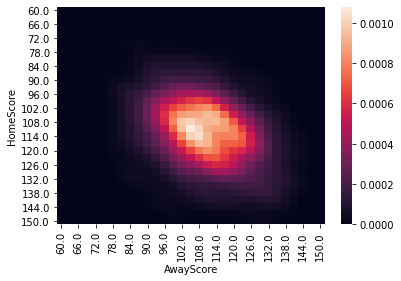

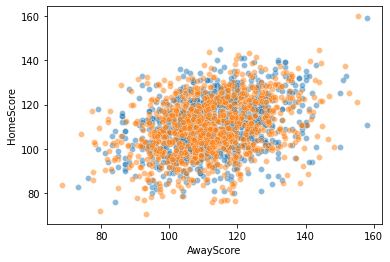

In [8]:
for season in df_scores['season'].unique():
    df_season = df_scores[df_scores['season']==season]
    plt.hist(df_season['HomeScore'], bins=bins, alpha=0.4)
    plt.hist(df_season['AwayScore'], bins=bins, alpha=0.4)
    plt.show()
    data, nx, ny = np.histogram2d(df_season['HomeScore'], df_season['AwayScore'], bins=bins)
    df_heat = pd.DataFrame(data, index=bins[:-1], columns=bins[:-1])
    sn.heatmap(df_heat)
    plt.xlabel('AwayScore')
    plt.ylabel('HomeScore')
    plt.show()
    kernel = gaussian_kde(df_season[['HomeScore', 'AwayScore']].values.T)
    X, Y = np.meshgrid(bins, bins)
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kernel(positions).T, X.shape)
    df_heat_prob = pd.DataFrame(Z.T, index=bins, columns=bins)
    sn.heatmap(df_heat_prob)
    plt.xlabel('AwayScore')
    plt.ylabel('HomeScore')
    plt.show()
    sn.scatterplot(df_season['HomeScore'], df_season['AwayScore'], alpha=0.5)
    samples = kernel.resample(len(df_season))
    sn.scatterplot(samples[0, :], samples[1, :], alpha=0.5)
    plt.xlabel('AwayScore')
    plt.ylabel('HomeScore')
    plt.show()

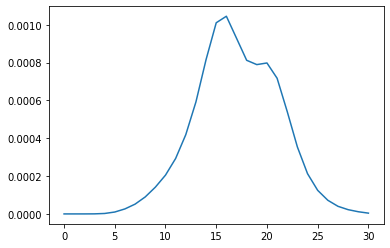

In [28]:
plt.plot(df_heat_prob.values[18])

In [11]:
kernel.covariance

array([[16.02938506,  5.21671124],
       [ 5.21671124, 14.97297377]])

In [72]:
from sklearn.neighbors import KernelDensity

In [76]:
df_heat

60.0   63.0   66.0   69.0   72.0   75.0   78.0   81.0   84.0   87.0   \
60.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
63.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
66.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
69.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
72.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
75.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
78.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
81.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
84.0     0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
87.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
90.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
93.0     0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    2.0    0.0   
96.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0   
99.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    2.0    2.0   
102.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    1.0   
105.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    2.0    2.0   
108.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    4.0   
111.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    2.0    0.0   
114.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
117.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    3.0   
120.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
123.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
126.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
129.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
132.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
135.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
138.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
141.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
144.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
147.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  120.0  123.0  126.0  129.0  132.0  135.0  138.0  141.0  144.0  \
60.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
63.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
66.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
69.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
72.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
78.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
81.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
84.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
87.0   ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
90.0   ...    0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
93.0   ...    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
96.0   ...    2.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
99.0   ...    4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
102.0  ...    3.0    3.0    3.0    0.0    1.0    1.0    0.0    0.0    0.0   
105.0  ...    7.0    1.0    4.0    3.0    1.0    1.0    0.0    0.0    0.0   
108.0  ...    7.0    5.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
111.0  ...    7.0    6.0    2.0    4.0    0.0    1.0    0.0    0.0    0.0   
114.0  ...   12.0    7.0    6.0    3.0    0.0    2.0    1.0    0.0    1.0   
117.0  ...   10.0

In [84]:
kernel = gaussian_kde(df_scores[['AwayScore', 'HomeScore']].values.T)

In [87]:
kernel([110, 120])

array([0.00068435])